---

# <center> ★ AI / ML Project - Student Marks Prediction ★

---

<img src="smp.jpg" style="width: 500px;"/>

---

### Description:

The data consists of Marks of students including their study time & number of courses. The dataset is downloaded from UCI Machine Learning Repository.

**Properties of the Dataset:** \
Number of Instances: 100\
Number of Attributes: 3 including the target variable.

The project is simple yet challenging as it is has very limited features & samples. Can you build regression model to capture all the patterns in the dataset, also maitaining the generalisability of the model?


### Objective:
- Understand the Dataset & perform the necessary cleanup.
- Build Regression models & fine-tune the hyperparamters to predict the student marks.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

## <center> Stractegic Plan of Action:

**We aim to solve the current problem statement by creating plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Feature Selection/Extraction
5. Predictive Modelling
6. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset

df = pd.read_csv('Student_Marks_Dataset.csv')
df.reset_index(drop=True, inplace=True)

target = 'Marks'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299



Inference: The Datset consists of 3 features & 100 samples.


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 1 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


**Inference:** The stats seem to be fine, let us do further visual analysis to confirm the same.

---

# <center> 2. Exploratory Data Analysis (EDA)

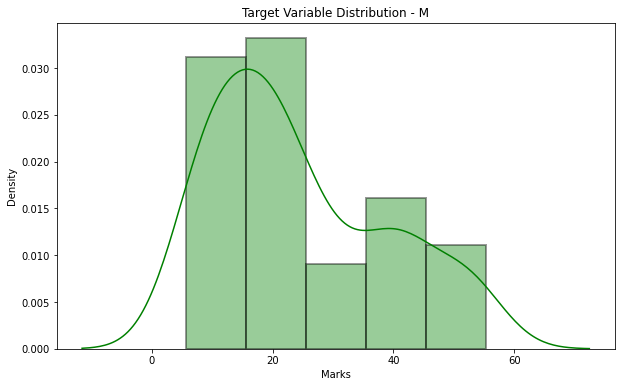

In [16]:
#Let us first analyze the distribution of the target variable

sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Target Variable Distribution - {}'.format(target[0]))
plt.show()

**Inference:** The Target Variable seems to be be normally distributed but skewed towards the right, averaging around 25marks.

                Visualising Categorical Features:                 


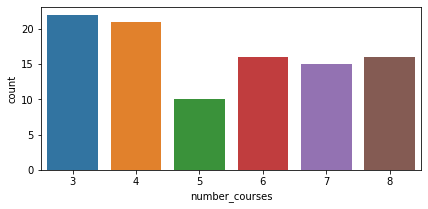

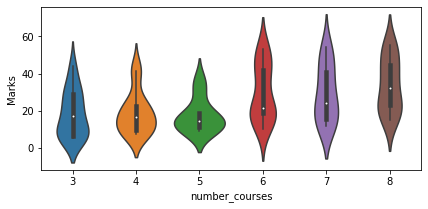

In [15]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(70))

n=2
plt.figure(figsize=[15,3])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.countplot(df[cf[i]])
plt.show()

plt.figure(figsize=[15,3])
for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.violinplot(x=df[cf[i]], y=df[target])
#plt.tight_layout()
plt.show()

**Inference:** 
- The number_cources feature has majority 3 courses & minority 5 classes. But their medians marks are also distinct as observed in the violine plots.

                       Numeric Features Distribution                        


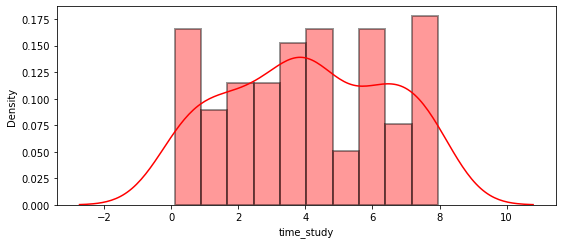

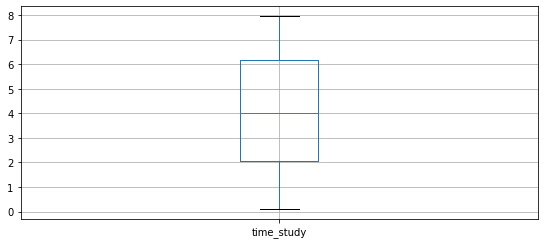

In [21]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(50+((len(nf)%4)*30)))

clr=['r','g','b','g','b','r']
n=2

plt.figure(figsize=[15,3.5])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=clr[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3.5])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There don't seem to be any major outliers in the numerical feature time_study.

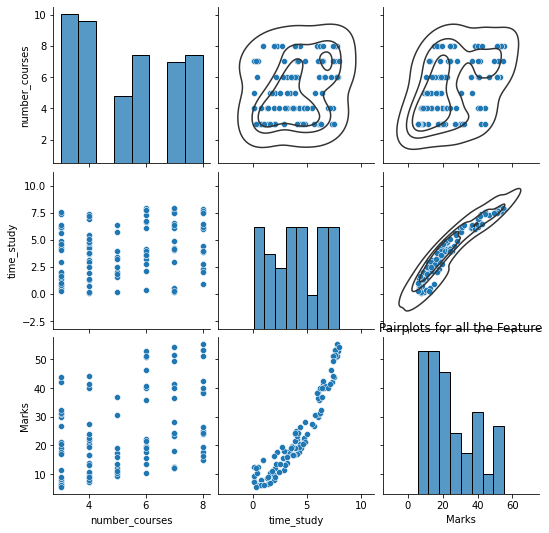

In [22]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that few features have linear relationship, & few are randomly distributed. Let us check for the multicollinearity in the feature selection/extraction step.

---

# <center> 3. Data Preprocessing

In [23]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset had {} inconsistant/null elements which were dropped.'.format(original_df.shape[0]-df.shape[0]))

number_courses    0
time_study        0
Marks             0
dtype: int64

Inference: The dataset had 0 inconsistant/null elements which were dropped.


In [25]:
#Removal of any Duplicate rows (if any)

df1 = df.drop_duplicates()

(rs,cs) = df1.shape

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {original_df.shape[0]-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [27]:
#Removal of outlier:

df2 = df1.copy()

for i in features:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
    df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299



Inference: After removal of outliers, The dataset now has 3 features & 100 samples.


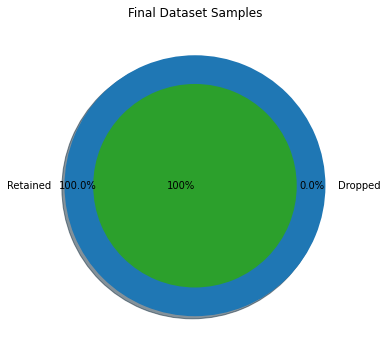

ZeroDivisionError: division by zero

In [28]:
#Final Dataset size after performing Preprocessing

df = df2.copy()
plt.title('Final Dataset Samples')
plt.pie([original_df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], 
        counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {df.shape[0]/(original_df.shape[0]-df.shape[0])}% of the data.')

---

# <center> 4. Data Manipulation

In [29]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(target,axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (100, 2) (100,) 
Training set  --->  (80, 2) (80,) 
Testing set   --->  (20, 2)  (20,)


In [30]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(80))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(80))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                     Standardardization on Training set                     


,number_courses,time_study
count,80.000000,8.000000e+01
mean,0.000000,-4.996004e-17
std,1.006309,1.006309e+00
min,-1.231606,-1.710350e+00
25%,-0.684226,-8.638663e-01
50%,-0.136845,-1.695124e-02
75%,0.957916,8.807528e-01
max,1.505297,1.680330e+00



                      Standardardization on Testing set                      


,number_courses,time_study
count,20.000000,20.000000
mean,0.109476,0.034161
std,0.913788,1.116633
min,-1.231606,-1.691372
25%,-0.684226,-0.709127
50%,0.410535,0.098861
75%,0.547381,0.965293
max,1.505297,1.501759


---

# <center> 5. Feature Selection/Extraction

                           Final Dataset Samples                            


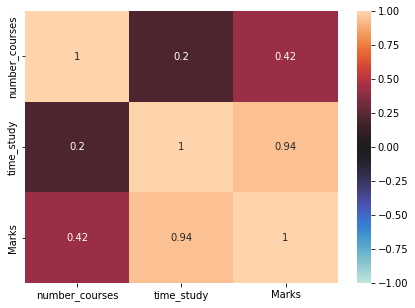

In [32]:
#Checking the correlation

print('\033[1mFinal Dataset Samples'.center(80))
plt.figure(figsize=[5+len(features),3+len(features)])
sns.heatmap(df.corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.show()

**Inference:** There seems to be some multi-correlation between the features. Let us peform statistical tests to confirm the same.

In [33]:
#Testing a Linear Regression model with statsmodels

from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     608.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           6.80e-48
Time:                        00:11:03   Log-Likelihood:                -213.09
No. Observations:                  80   AIC:                             432.2
Df Residuals:                      77   BIC:                             439.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.1342      0.396     60.995      0.000      23.346      24.922
number_courses     3.4621      0.403      8.582      0.000       2.659       4.265
time_study        12.6998      0.403     31.482      0.000      11.897      13.503
==============================================================================
Omnibus:                       15.900   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.875
Skew:                           0.574   Prob(JB):                       0.0195
Kurtosis:                       1.977   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ---

**Inference:** 
the model is appropriate & does not require multicollinearity fixing.

---

# <center> 6. Predictive Modelling

In [36]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(Train_X_std):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.xlabel(i)
        plt.ylabel(target)
        plt.legend()
    plt.tight_layout()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*21))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*22, '-'*25))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


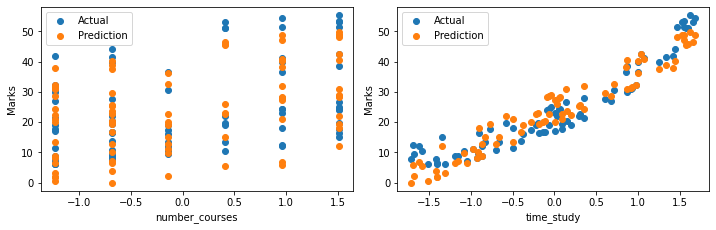



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 964.41
Mean Squared Error (MSE) on Training set       ---> 12.06
Root Mean Squared Error (RMSE) on Training set ---> 3.47

--------------------Testing Set Metrics---------------------

R2-Score on Testing set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 252.93
Mean Squared Error (MSE) on Training set       ---> 12.65
Root Mean Squared Error (RMSE) on Training set ---> 3.56

----------------------Residual Plots-------------------------


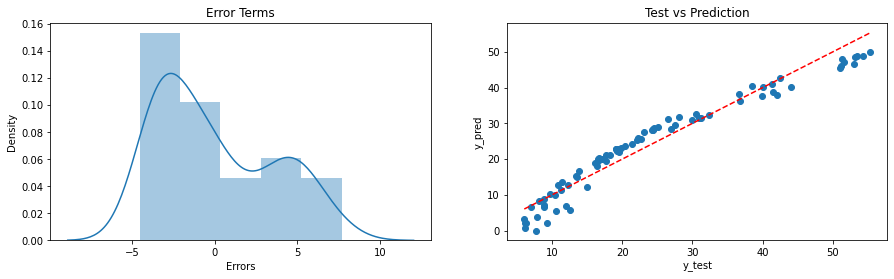

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Train_X_std = Train_X_std[Train_X.columns]
Test_X_std = Test_X_std[Test_X.columns]

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


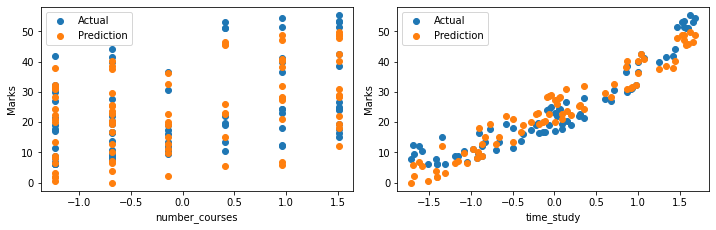



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 964.42
Mean Squared Error (MSE) on Training set       ---> 12.06
Root Mean Squared Error (RMSE) on Training set ---> 3.47

--------------------Testing Set Metrics---------------------

R2-Score on Testing set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 252.42
Mean Squared Error (MSE) on Training set       ---> 12.62
Root Mean Squared Error (RMSE) on Training set ---> 3.55

----------------------Residual Plots-------------------------


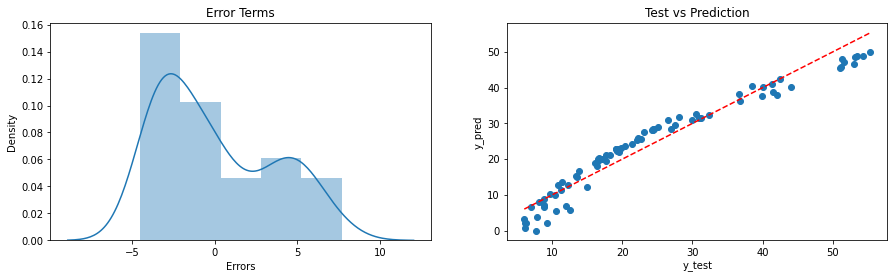

In [38]:
#Creating a Ridge Regression model

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ncv=5
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
Grid_Search_CV = GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=ncv).fit(Train_X_std,Train_Y)

Train_X_std = Train_X_std[Train_X.columns]
Test_X_std = Test_X_std[Test_X.columns]

RLR = Ridge(alpha=Grid_Search_CV.best_params_['alpha']).fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


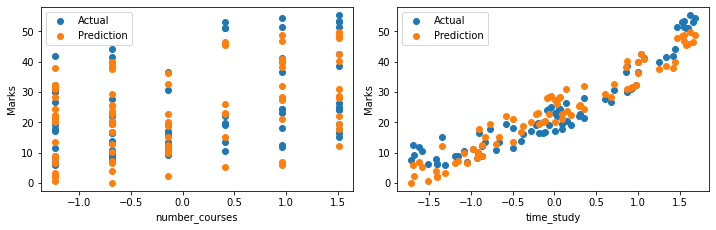



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 964.74
Mean Squared Error (MSE) on Training set       ---> 12.06
Root Mean Squared Error (RMSE) on Training set ---> 3.47

--------------------Testing Set Metrics---------------------

R2-Score on Testing set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 250.6
Mean Squared Error (MSE) on Training set       ---> 12.53
Root Mean Squared Error (RMSE) on Training set ---> 3.54

----------------------Residual Plots-------------------------


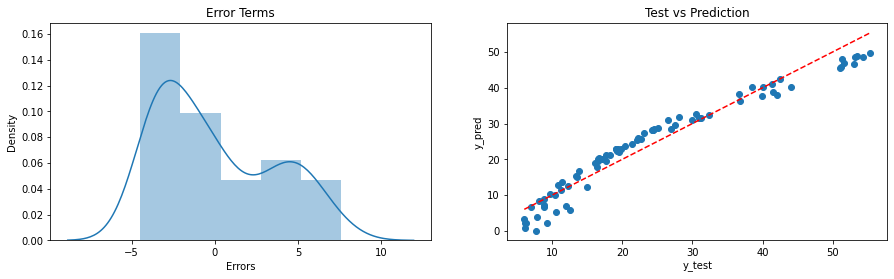

In [40]:
#Creating a Lasso Regression model

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ncv=5
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
Grid_Search_CV = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=ncv).fit(Train_X_std,Train_Y)

Train_X_std = Train_X_std[Train_X.columns] #Filtering columns
Test_X_std = Test_X_std[Test_X.columns]    #Filtering columns

LLR = Lasso(alpha=Grid_Search_CV.best_params_['alpha']).fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


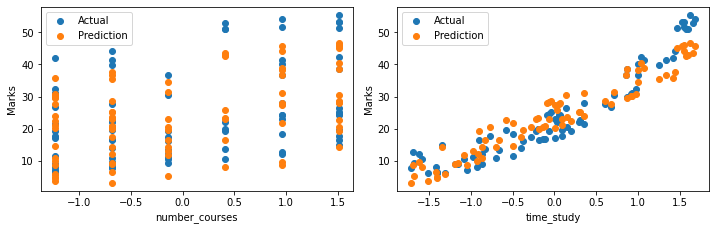



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.92
Residual Sum of Squares (RSS) on Training set  ---> 1224.99
Mean Squared Error (MSE) on Training set       ---> 15.31
Root Mean Squared Error (RMSE) on Training set ---> 3.91

--------------------Testing Set Metrics---------------------

R2-Score on Testing set ---> 0.94
Residual Sum of Squares (RSS) on Training set  ---> 256.21
Mean Squared Error (MSE) on Training set       ---> 12.81
Root Mean Squared Error (RMSE) on Training set ---> 3.58

----------------------Residual Plots-------------------------


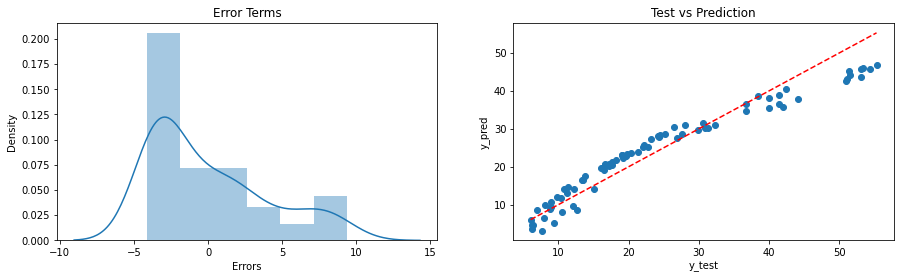

In [41]:
#Creating a ElasticNet Regression model

from sklearn.linear_model import ElasticNet

ncv=5
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
Grid_Search_CV = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=ncv).fit(Train_X_std,Train_Y)

Train_X_std = Train_X_std[Train_X.columns]
Test_X_std = Test_X_std[Test_X.columns]

ENR = ElasticNet(alpha=Grid_Search_CV.best_params_['l1_ratio'],l1_ratio=Grid_Search_CV.best_params_['l1_ratio']).fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

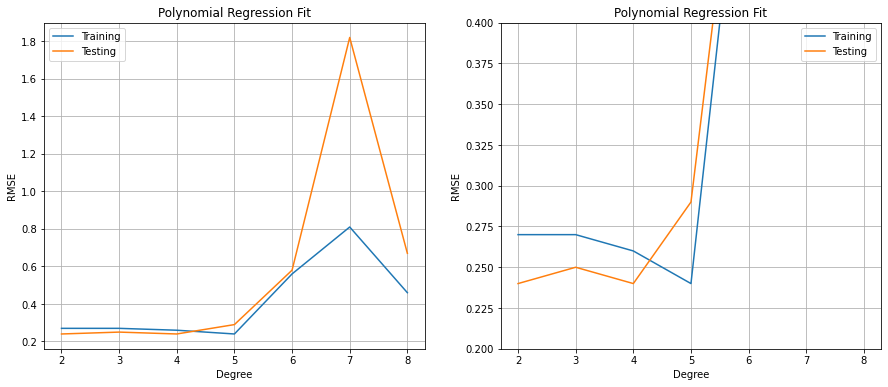

In [44]:
#Checking polynomial regression performance on various degrees

from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]

for i in range(2,9):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,9),Trr, label='Training')
plt.plot(range(2,9),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.2,0.4])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 4th order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.46211647 12.69982433]
The Intercept of the Regresion Model was found to be  24.1342


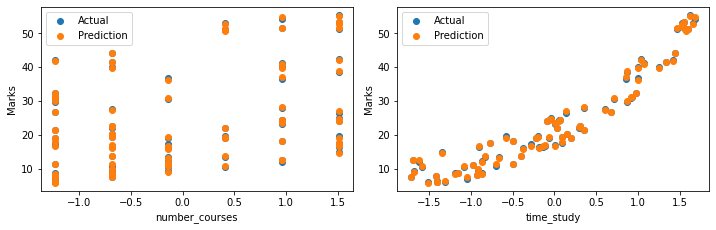



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 5.94
Mean Squared Error (MSE) on Training set       ---> 0.07
Root Mean Squared Error (RMSE) on Training set ---> 0.27

--------------------Testing Set Metrics---------------------

R2-Score on Testing set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 1.13
Mean Squared Error (MSE) on Training set       ---> 0.06
Root Mean Squared Error (RMSE) on Training set ---> 0.24

----------------------Residual Plots-------------------------


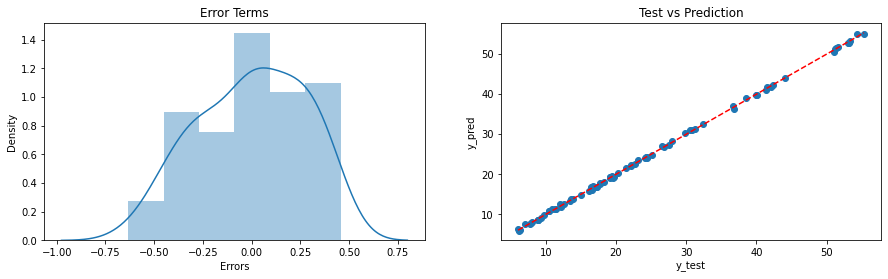

In [45]:
#Using the 3rd Order Polynomial Regression model (degree=3)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [46]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.94,0.94,964.41,252.93,12.06,12.65,3.47,3.56
Ridge Linear Regression (RLR),0.94,0.94,964.42,252.42,12.06,12.62,3.47,3.55
Lasso Linear Regression (LLR),0.94,0.94,964.74,250.60,12.06,12.53,3.47,3.54
Elastic-Net Regression (ENR),0.92,0.94,1224.99,256.21,15.31,12.81,3.91,3.58
Polynomial Regression (PNR),1.00,1.00,5.94,1.13,0.07,0.06,0.27,0.24


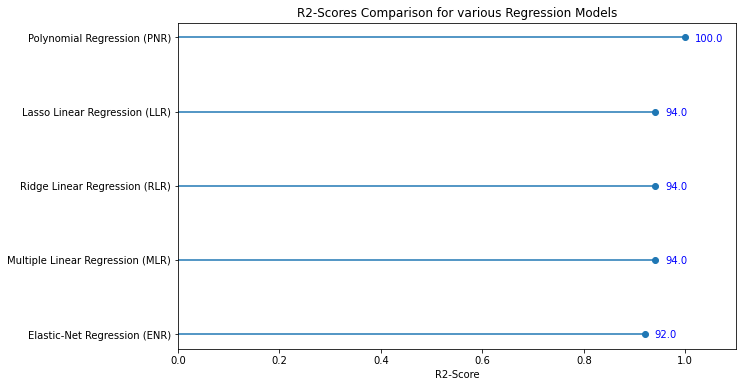

In [47]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

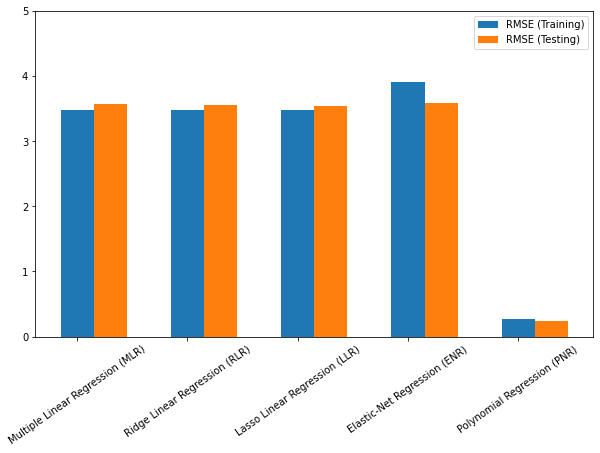

In [49]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.ylim([0,5])
plt.legend()
plt.show()

**Inference:** Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. \
For this problem, it is can be said that polynomial regressions are the best choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 100 samples & after preprocessing none of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had some multicollinearity, but since we had only 2 features, we did not perform any feature selection/extraction.
- Testing multiple algorithms with hyperparamter-tuning gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-2) gave the best overall scores for the current dataset, yet it wise to also consider simpler models like MLR & ENR as they are more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>